In [1]:
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i9-9880H CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, skylake)


In [2]:
using Plots
using DifferentialEquations

In [3]:
t = 0:0.01:10

0.0:0.01:10.0

一次元調和振動子の Hamiltonian は

$$
H(q,p) = \dfrac{p^2}{2m} + \dfrac{1}{2}m\omega^2q^2
$$

と表せる．

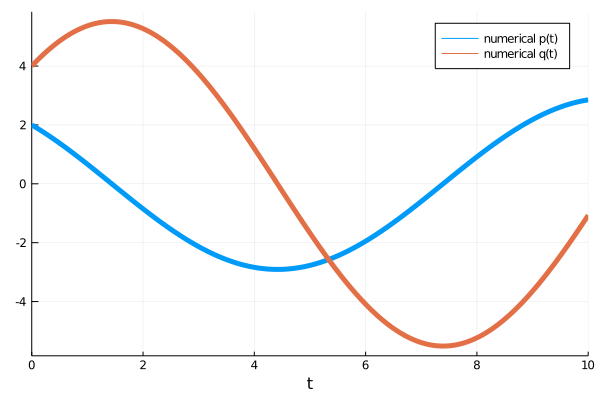

In [9]:
m = 1 #m ≠ 1 だと解析解と合わない
k = rand()
ω = √(k/m)
p0 = 2.0
q0 = 4.0
t = 0:0.01:2*pi
H(p , q , param=Float64[]) = (p^2 / (2*m)) + (1/2) * k * q^2
prob = HamiltonianProblem(H , p0 , q0 , (0. , 10.))
sol = solve(prob , dt = 0.01)
plot(sol , lw = 5 , label = ["numerical p(t)" "numerical q(t)"])

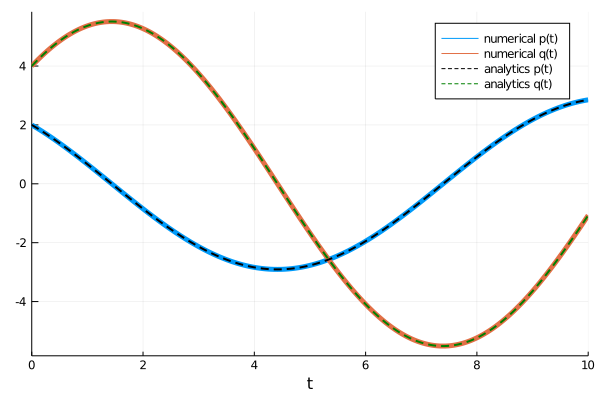

In [10]:
#Q(t) = q0*cos(ω*t) + (p0/(m*ω))*sin(ω*t)
#P(t) = -m*ω*q0*sin(ω*t) +  p0*cos(ω*t)

Q(t) = q0*cos(ω*t) + (p0/(m*ω))*sin(ω*t)
P(t) = -m*ω*q0*sin(ω*t) +  p0*cos(ω*t)

plot!(t , P , lw = 2 , ls = :dash , label = "analytics p(t)" , color = :black)
plot!(t , Q , lw = 2 , ls = :dash , label = "analytics q(t)" , color = :green)